# Data Filtering

#### Objective 🥅

Data is real-world is far from prefect. This notebook aims to expose the participants to a workflow for filtering sensor data. 

### Scenario Epsilon

This is notebook, we will be using a combined stormwater network with eleven controllable assets in the stormwater network. These controllable assets are represented by the orange nodes in the image below.

TODO: add epsilon image

**Problem Statement**

We have recorded measured data from all the eleven controllable locations during consequtive stormevents and we want to estimate the storage utilization in the network. 

### Exercise 1
Load, visuvalize, and figure out what is hiding in the data 🔍

In [28]:
# Note: We will be relying on pandas a lot to help us deal with timeseries data
# if you haven't used pandas before, we cannot recommend it enough! 
# We ❤️ 🐼
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# RC parms for pretty plots 💁🏽
plt.rcParams.update({'font.size': 14, "text.usetex": True})
plt.style.use('seaborn-v0_8-whitegrid')
plt.style.use('seaborn-v0_8-dark-palette')

In [2]:
# load the measured data
measured_data = pd.read_csv("./data/measured_data_epsilon.csv")

In [3]:
measured_data

,Unnamed: 0,004,006,011,022,027,030,033,039,044,050,060
0,2017-01-01 00:15:00,-0.118573,0.583584,-0.729511,0.156844,-1.258532,0.019059,0.139584,-0.082873,-0.064562,-0.750428,0.604661
1,2017-01-01 00:30:00,-0.966093,0.181232,-0.073251,0.493221,-0.414683,-0.003815,-0.148578,0.510994,0.411667,-0.020879,0.870526
2,2017-01-01 00:45:00,-0.501021,-0.350498,-0.445071,0.302951,0.236279,-0.022322,-0.319212,0.589436,-0.035210,0.030639,0.837086
3,2017-01-01 01:00:00,0.304464,0.573447,-0.674869,0.278246,0.071017,0.092180,1.158549,0.463271,0.355917,-0.082693,0.861668
4,2017-01-01 01:15:00,0.113248,0.118139,-0.180172,0.277715,0.554332,0.285371,1.018741,0.484992,-0.839067,-0.111543,0.781253
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2017-01-15 23:00:00,2.374190,2.052514,2.063090,2.468507,2.170727,1.538653,2.031443,1.518821,2.147864,0.688303,2.628175
1436,2017-01-15 23:15:00,2.301471,1.559424,2.999763,2.396136,2.175811,1.580644,1.774302,1.051575,2.404624,0.733670,2.433861
1437,2017-01-15 23:30:00,2.134093,1.203303,2.265810,2.369207,2.087329,1.647852,1.780591,1.358034,3.162847,0.721088,2.474065
1438,2017-01-15 23:45:00,2.364278,1.085105,3.141722,2.406874,2.472516,1.778373,1.418749,1.249254,2.867431,0.725747,2.334395


Each column represents the depth measurement data in **ft** in the storage asset represented by the orange nodes in the above figure. The column <code>Unnamed: 0</code> represents the time of the measurement.

In [4]:
# let us set the timestamp as the index of the index
# index will help us better query depth data
measured_data = measured_data.set_index("Unnamed: 0")
# convert index to datetime object
measured_data.index = pd.to_datetime(measured_data.index)

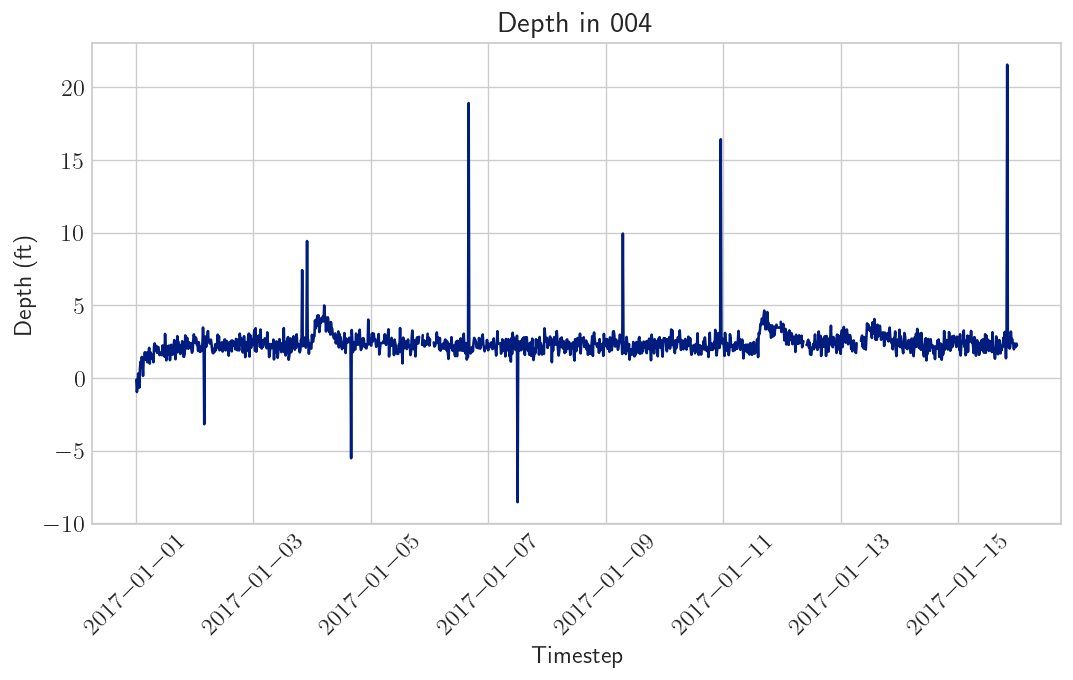

In [16]:
plt.figure(figsize=(10, 5), dpi=125)
plt.plot(measured_data['004'])
plt.title("Depth in 004")
plt.ylabel("Depth (ft)")
plt.xlabel("Timestep")
# Rotate axis so that they are readable
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

There is a definitely something going on, clearly depth cannot be negative and it cannot rapidly go from 3 to 20. So we need to remove anamolies. But let us zoom into it see if there something else going on

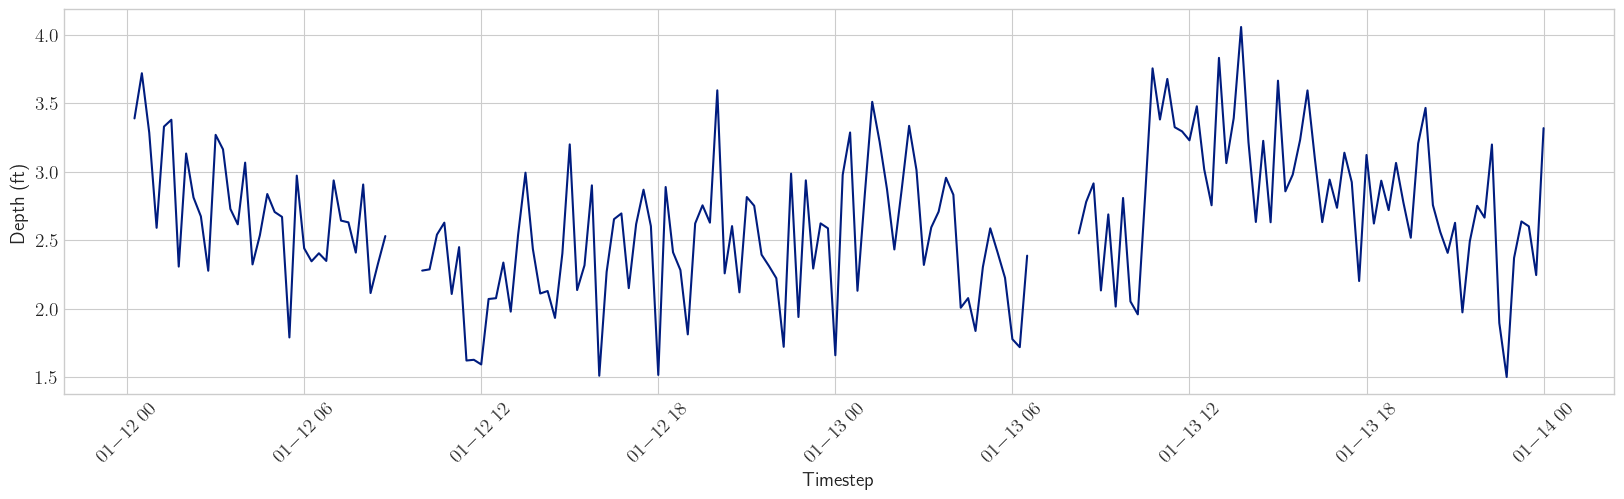

In [23]:
# Zoom and enhance
# Let us take a look at the diurnal patters to see if need to handle anything else
depth_4 = measured_data['004'].loc[pd.Timestamp("2017-01-12"):pd.Timestamp("2017-01-14")]

plt.figure(figsize=(20, 5), dpi=100)
plt.plot(depth_4)
plt.ylabel("Depth (ft)")
plt.xlabel("Timestep")
# Rotate axis so that they are readable
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

That does not look like a diurnal pattern. If you squint, it does look like there is a signal hiding amongst the noise. Furthermore, it looks there some gaps in the data as well. Let us take look to see how these gaps are represented. 

In [24]:
measured_data['004'].loc[pd.Timestamp("2017-01-06"):pd.Timestamp("2017-01-07")]

Unnamed: 0
2017-01-06 00:00:00    2.227209
2017-01-06 00:15:00    2.648460
2017-01-06 00:30:00         NaN
2017-01-06 00:45:00    2.428808
2017-01-06 01:00:00         NaN
                         ...   
2017-01-06 23:00:00    2.096625
2017-01-06 23:15:00    2.206124
2017-01-06 23:30:00    2.615404
2017-01-06 23:45:00    2.072960
2017-01-07 00:00:00    1.907961
Name: 004, Length: 97, dtype: float64

Looks like there are some NaNs hiding in the data as well. There are a lot types of NaNs in Python 😭, pandas has dronna function which will solve all our problems.

**Summary**
1. There are outliers in the depth data that have be filtered
2. There is measurement noise in the data
3. There are NaN is the data

🏋🏽 **Exercise 1.1**

Explore data to see if there is anything else hiding in data?

😉 Hint 1 -> Take a look at site 006 

😉 Hint 2 -> Gradient can be computed using <code>measured_data['004'].diff()<code>

In [51]:
# Querying data for for a particular site
measured_data['006']

Unnamed: 0
2017-01-01 00:15:00    0.583584
2017-01-01 00:30:00    0.181232
2017-01-01 00:45:00   -0.350498
2017-01-01 01:00:00    0.573447
2017-01-01 01:15:00    0.118139
                         ...   
2017-01-15 23:00:00    2.052514
2017-01-15 23:15:00    1.559424
2017-01-15 23:30:00    1.203303
2017-01-15 23:45:00    1.085105
2017-01-16 00:00:00    1.695105
Name: 006, Length: 1440, dtype: float64

In [59]:
# Estimate gradient
measured_data['004'].diff()

Unnamed: 0
2017-01-01 00:15:00         NaN
2017-01-01 00:30:00   -0.847520
2017-01-01 00:45:00    0.465072
2017-01-01 01:00:00    0.805484
2017-01-01 01:15:00   -0.191215
                         ...   
2017-01-15 23:00:00    0.400383
2017-01-15 23:15:00   -0.072719
2017-01-15 23:30:00   -0.167378
2017-01-15 23:45:00    0.230185
2017-01-16 00:00:00   -0.125986
Name: 004, Length: 1440, dtype: float64

In [52]:
# Use the gradient to figure the hiding anamoly
# < Your amesome code goes here >

### Exercise 2

Based on the issues identified in Exercise-1, clean the data! 

In [197]:
depth_4 = measured_data['004']

In [198]:
# Let us remove NaN values first
depth_4 = depth_4.dropna()
# Let us clear off the negative values next
depth_4 = depth_4[depth_4 > 0.0]
# Remove the flat lines
# 1. gradient of 0.0 means flatline
gradient = depth_4.diff()
# 2. identify the timesteps when gradients are 0
index_flatlines = depth_4[depth_4.diff() == 0.0].index
# 3. remove these values
depth_4 = depth_4.drop(index_flatlines)

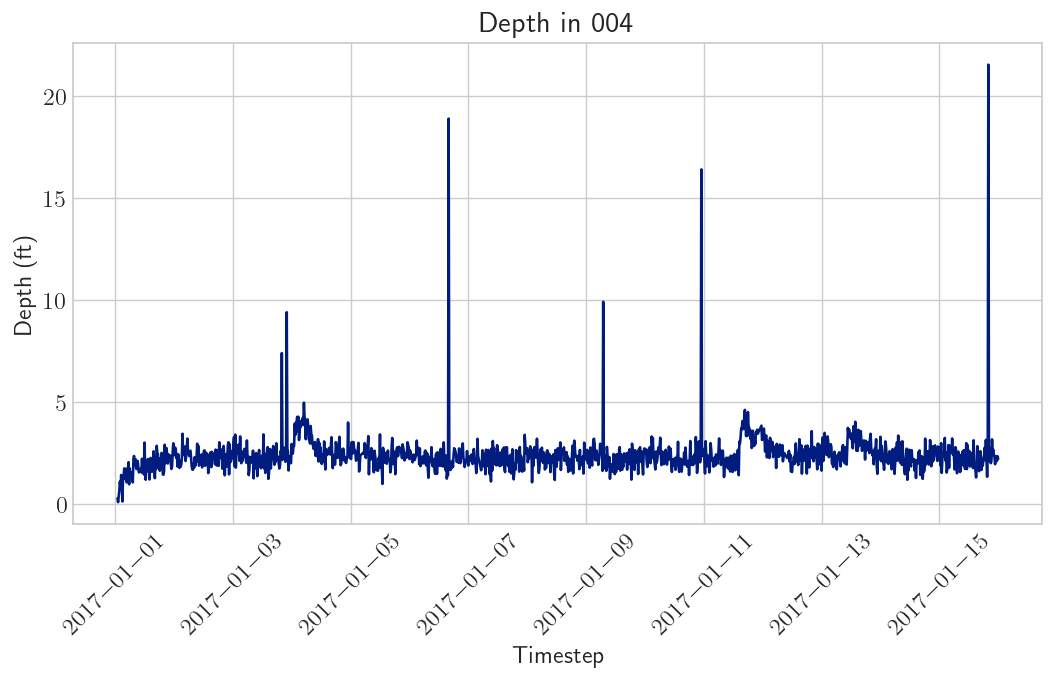

In [199]:
plt.figure(figsize=(10, 5), dpi=125)
plt.plot(depth_4)
plt.title("Depth in 004")
plt.ylabel("Depth (ft)")
plt.xlabel("Timestep")
# Rotate axis so that they are readable
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

Now to the fun stuff! lets remove the anamolies from the data. Thankfully, they look like they are obvious, let us try something simple.

In [200]:
# 4. remove the anamolies
mean = depth_4.mean()
std = depth_4.std()
# Let remove everything that exceeds 95% CI
upper_limit = mean + 2 * std

In [201]:
upper_limit

4.428360140874696

In [202]:
depth_4[depth_4 > upper_limit]

Unnamed: 0
2017-01-03 20:00:00     7.421925
2017-01-03 22:00:00     9.422607
2017-01-04 05:00:00     4.987951
2017-01-06 16:00:00    18.912453
2017-01-09 07:00:00     9.935591
2017-01-10 23:00:00    16.424590
2017-01-11 16:45:00     4.636425
2017-01-11 18:00:00     4.533050
2017-01-15 20:00:00    21.558017
Name: 004, dtype: float64

In [203]:
up_limit_excess = depth_4[depth_4 > upper_limit].index

In [204]:
depth_4 = depth_4.drop(up_limit_excess)

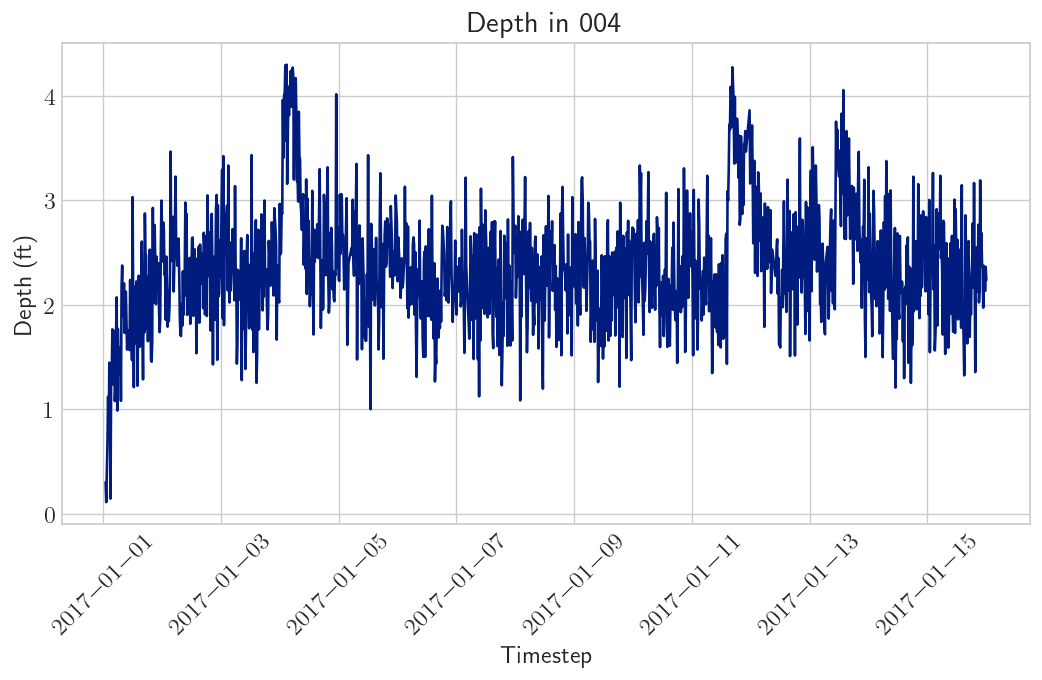

In [205]:
plt.figure(figsize=(10, 5), dpi=125)
plt.plot(depth_4)
plt.title("Depth in 004")
plt.ylabel("Depth (ft)")
plt.xlabel("Timestep")
# Rotate axis so that they are readable
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

🏋🏽 **Exercise 2.1**

Using the above code, clean the data for rest of the sites

In [85]:
cleaned_depth_data = pd.DataFrame()

for site in measured_data.columns:
    # Isolate the data for a site 
    depth_site = measured_data[site]
    
    # Let us remove NaN values first

    
    # Let us clear off the negative values next

    
    # Remove the flat lines
    # 1. gradient of 0.0 means flatline

    # 2. identify the timesteps when gradients are 0

    # 3. remove these values

    
    
    # 4. remove the anamolies

    # Let remove everything that exceeds 95% CI

    # Note: concat function helps stack the cleaned data into columns
    # We assume depth_site is the name of the cleaned data 
    # This is equivalent to the depth_4 above.
    cleaned_depth_data = pd.concat([cleaned_depth_data, depth_site], axis=1)

### Exercise 3

Now that we have cleaned the obvious stuff, how do we clean the measurement noise that is obfuscating our data. 

Let us take some help from my favourite Frechman, Joseph Fourier

![Fourier](https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Fourier2_-_restoration1.jpg/440px-Fourier2_-_restoration1.jpg)

We will use a 200 year old method to help us extract our signal. 
[Denoising Data using FFT](https://www.youtube.com/watch?v=s2K1JfNR7Sc) provides a really good overview of the fourier filtering approach.

In [86]:
def fourier_filtering(signal, t, dt, psd_threshold):
    n = len(t)
    # Compute the FFT
    fhat = np.fft.fft(signal,n)
    # Power spectrum (power per freq)
    PSD = fhat * np.conj(fhat) / n
     # Create x-axis of frequencies in Hz
    freq = (1/(dt*n)) * np.arange(n)
    # Only plot the first half of freqs
    L = np.arange(1, np.floor(n/2),dtype='int')
    # Find all freqs with large power
    indices = PSD > psd_threshold
    # Zero out all others
    PSDclean = PSD * indices
    # Zero out small Fourier coeffs. in Y
    fhat = indices * fhat
    # Inverse FFT for filtered time signal
    ffilt = np.fft.ifft(fhat)
    return freq, PSD, ffilt, L, PSDclean

In [212]:
def filter_columns(data, column_name, psd_threshold, plot):
    # convert datetime index to seconds starting from 0
    depth_site = data[[column_name]]
    depth_site = depth_site.resample("15min").mean().interpolate()
    depth_site['time'] = depth_site.index.values
    depth_site['time'] = (depth_site['time'] - depth_site['time'][0]).apply(lambda x: x.total_seconds())
    
    # Note: 1/900 as each timestep is 15min = 900s econds
    freq, PSD, ffilt, L, PSDclean = fourier_filtering(signal=depth_site[column_name].values,
                                                      t=depth_site['time'].values,
                                                      dt=1/900.0,
                                                      psd_threshold=psd_threshold)
    if plot:
        plt.figure(figsize=(20, 10), dpi=125)
        plt.subplot(2, 1, 1)
        plt.plot(depth_site.index, depth_site[column_name].values, label='Noisy', alpha=0.5)
        plt.plot(depth_site.index, ffilt,color='b',label='Filtered', linewidth=2.0)
        plt.ylabel("Depth (ft)")
        plt.xlabel("Time")
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(freq[L],PSD[L],label='Noisy', alpha=0.9)
        plt.plot(freq[L],PSDclean[L],label='Filtered', linewidth=2.0)
        plt.xlim(freq[L[0]], 20)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("PSD")

        plt.legend()
        plt.suptitle(f"{column_name} Filtered")
        plt.show()
    else:
        return pd.DataFrame(data={column_name:ffilt}, index=depth_site.index)

/Users/pluto/Archive/dev/ewri2023_DigitalWater101/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


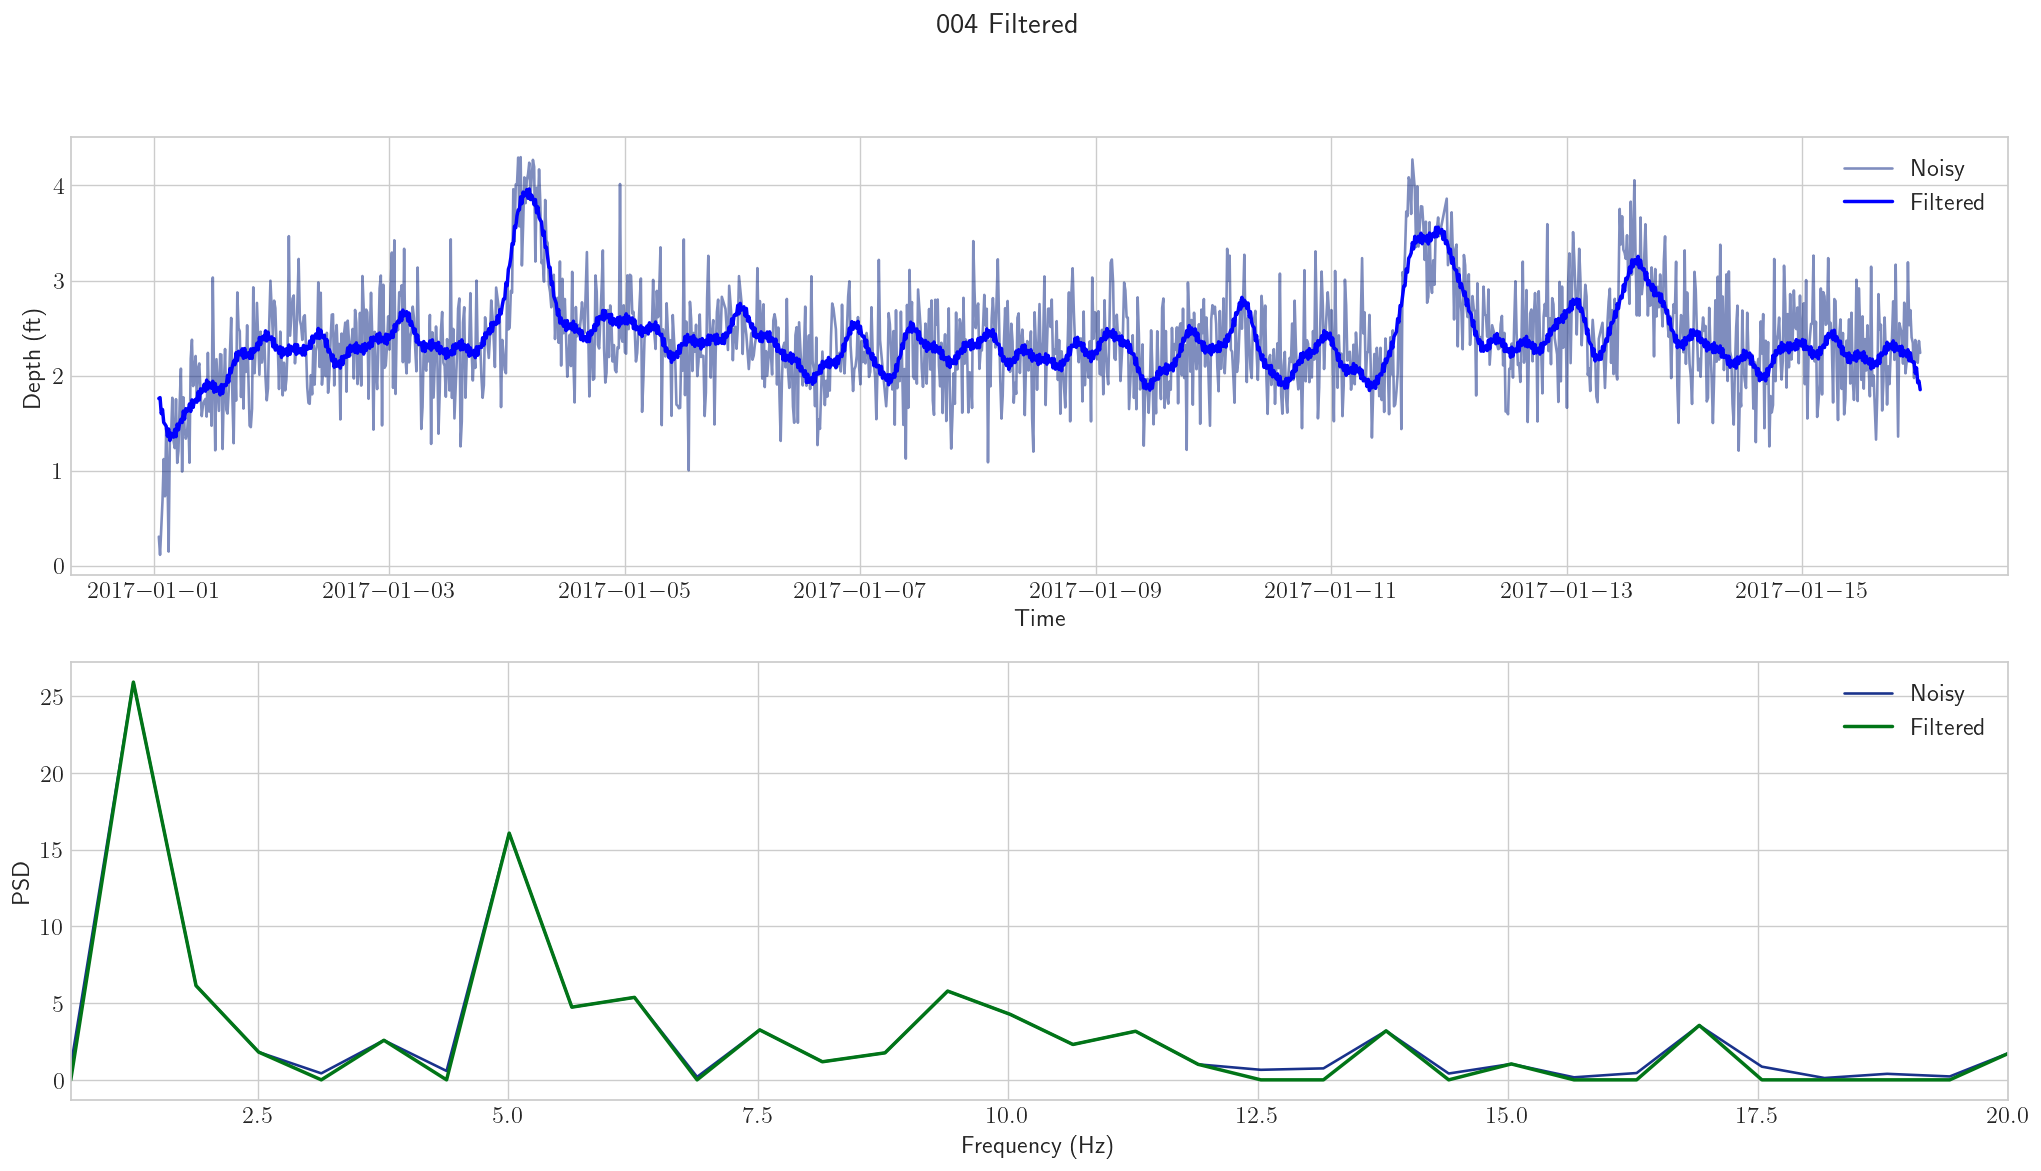

In [214]:
filter_columns(data=depth_4.to_frame(), column_name='004', psd_threshold=1.0, plot=True)